**This notebook is an exercise in the [Data Cleaning](https://www.kaggle.com/learn/data-cleaning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/scaling-and-normalization).**

---


In this exercise, you'll apply what you learned in the **Scaling and normalization** tutorial.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
from learntools.core import binder
binder.bind(globals())
from learntools.data_cleaning.ex2 import *
print("Setup Complete")

Setup Complete


# Get our environment set up

To practice scaling and normalization, we're going to use a [dataset of Kickstarter campaigns](https://www.kaggle.com/kemical/kickstarter-projects). (Kickstarter is a website where people can ask people to invest in various projects and concept products.)

The next code cell loads in the libraries and dataset we'll be using. 

In [2]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
kickstarters_2017 = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(0)

In [3]:
kickstarters_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
kickstarters_2017.shape

(378661, 15)

In [6]:
kickstarters_2017.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

it seems that many values in the usd_pledged column havn't been recorded

In [7]:
kickstarters_2017['usd pledged']

0            0.0
1          100.0
2          220.0
3            1.0
4         1283.0
           ...  
378656      25.0
378657     155.0
378658      20.0
378659     200.0
378660     524.0
Name: usd pledged, Length: 378661, dtype: float64

Let's start by scaling the goals of each campaign, which is how much money they were asking for.  The plots show a histogram of the values in the "usd_goal_real" column, both before and after scaling.  

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

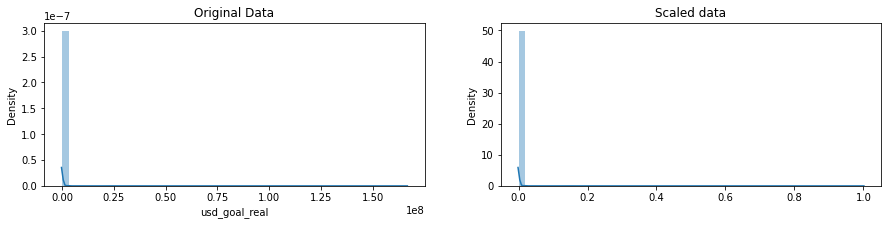

In [8]:
# select the usd_goal_real column
original_data = pd.DataFrame(kickstarters_2017.usd_goal_real)

# scale the goals from 0 to 1
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

After scaling, all values lie between 0 and 1 (you can read this in the horizontal axis of the second plot above, and we verify in the code cell below).

In [9]:
print('Original data\nPreview:\n', original_data.head())
print('Minimum value:', float(original_data.min()),
      '\nMaximum value:', float(original_data.max()))
print('_'*30)

print('\nScaled data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),
      '\nMaximum value:', float(scaled_data.max()))

Original data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value: 0.01 
Maximum value: 166361390.71
______________________________

Scaled data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


# 1) Practice scaling

We just scaled the "usd_goal_real" column. What about the "goal" column?

Begin by running the code cell below to create a DataFrame `original_goal_data` containing the "goal" column.

In [11]:
# select the usd_goal_real column
original_goal_data = pd.DataFrame(kickstarters_2017.goal)

In [12]:
original_goal_data.head()

,goal
0,1000.0
1,30000.0
2,45000.0
3,5000.0
4,19500.0


Use `original_goal_data` to create a new DataFrame `scaled_goal_data` with values scaled between 0 and 1. You must use the `minmax_scaling()` function.

In [13]:
# TODO: Your code here
scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])
# Check your answer
q1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# Lines below will give you a hint or solution code
#q1.hint()
#q1.solution()

# 2) Practice normalization

Now you'll practice normalization. We begin by normalizing the amount of money pledged to each campaign.

In [21]:
kickstarters_2017['usd_pledged_real']

0            0.0
1         2421.0
2          220.0
3            1.0
4         1283.0
           ...  
378656      25.0
378657     155.0
378658      20.0
378659     200.0
378660     524.0
Name: usd_pledged_real, Length: 378661, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

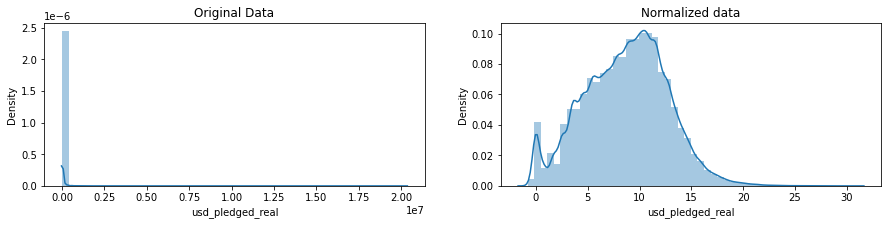

In [15]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0], 
                               name='usd_pledged_real', index=positive_pledges.index)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

It's not perfect (it looks like a lot pledges got very few pledges) but it is much closer to a normal distribution!

In [16]:
print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
______________________________

Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361


We used the "usd_pledged_real" column. Follow the same process to normalize the "pledged" column. 

In [22]:
kickstarters_2017['pledged'].head(30)

0         0.00
1      2421.00
2       220.00
3         1.00
4      1283.00
5     52375.00
6      1205.00
7       453.00
8      8233.00
9      6240.57
10        0.00
11    12700.00
12        0.00
13        0.00
14    94175.00
15      664.00
16      395.00
17      789.00
18      250.00
19     1781.00
20    34268.00
21        1.00
22      650.00
23       48.00
24      701.66
25    15827.00
26        0.00
27    48905.00
28      112.38
29    57577.31
Name: pledged, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


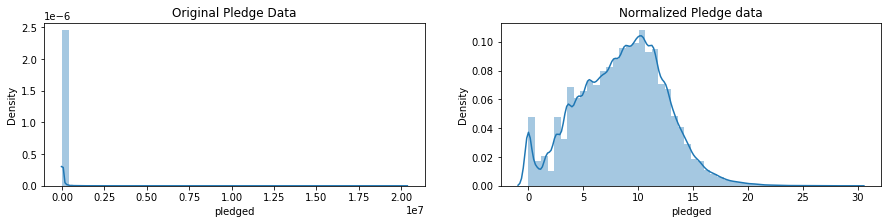

In [25]:
# TODO: Your code here!
index_of_pledges = kickstarters_2017.pledged > 0
positively_pledged = kickstarters_2017.pledged.loc[index_of_pledges]

normalized = pd.Series(stats.boxcox(positively_pledged)[0], name = 'pledged',
                      index = positively_pledged.index)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(15,3))
sns.distplot(positively_pledged, ax=ax[0])
ax[0].set_title("Original Pledge Data")
sns.distplot(normalized, ax=ax[1])
ax[1].set_title("Normalized Pledge data")
plt.show()

**The pledges data has almost same distribution as usd_pledged_real**

How does the normalized "usd_pledged_real" column look different from when we normalized the "pledged" column?  Or, do they look mostly the same?

Once you have an answer, run the code cell below.

In [26]:
# Check your answer (Run this code cell to receive credit!)
q2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct:</span> 

The distributions in the normalized data look mostly the same.

In [ ]:
# Line below will give you a hint
#q2.hint()

# (Optional) More practice

Try finding a new dataset and pretend you're preparing to perform a [regression analysis](https://www.kaggle.com/rtatman/the-5-day-regression-challenge). 

[These datasets are a good start!](https://www.kaggle.com/rtatman/datasets-for-regression-analysis)

Pick three or four variables and decide if you need to normalize or scale any of them and, if you think you should, practice applying the correct technique.

# Keep going

In the next lesson, learn how to [**parse dates**](https://www.kaggle.com/alexisbcook/parsing-dates) in a dataset.

---




*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum/172650) to chat with other Learners.*